# Think in 5 Buckets:

1. Who is the customer? (Age, Gender)

2. How do they earn? (Income, Job)

3. How big is the loan? (Credit, EMI)

4. How stable are they? (Job years, Housing)

5. Did they default? (TARGET)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\VSR07\Datasets csv,excel\application_train.csv")
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(307511, 122)

In [5]:
print(df.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [11]:
print(df.isnull().sum().tolist()) #missing values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 278, 1292, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202929, 0, 0, 0, 0, 0, 0, 96391, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 173378, 660, 60965, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297, 148431, 156341, 145755, 1021, 1021, 1021, 1021, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41519, 41519, 41519, 41519, 41519, 41519]


In [19]:
#missing values in percentage
missing_percent = (df.isnull().sum()/len(df))*100
missing_percent.sort_values(ascending=False)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
FLAG_DOCUMENT_16             0.000000
FLAG_DOCUMENT_15             0.000000
FLAG_DOCUMENT_14             0.000000
FLAG_DOCUMENT_20             0.000000
FLAG_DOCUMENT_21             0.000000
Length: 122, dtype: float64

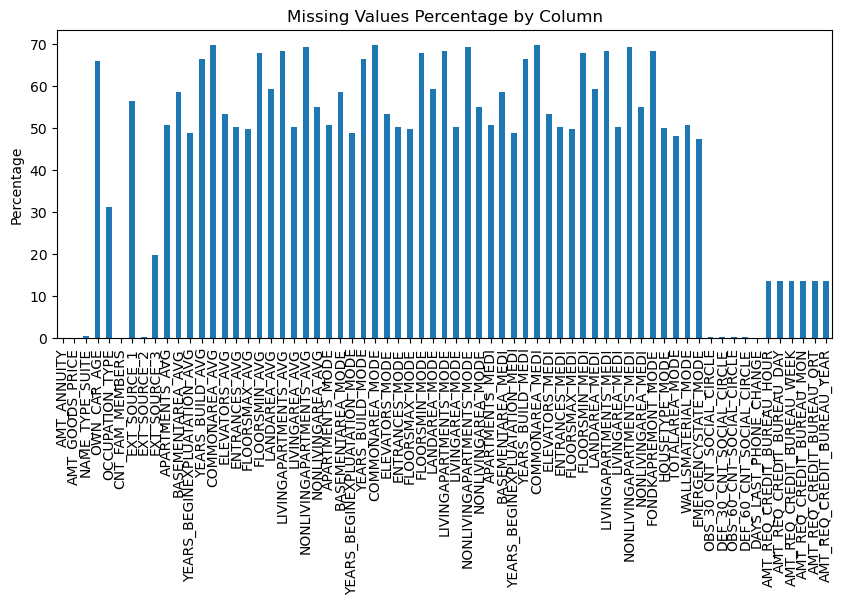

In [16]:
import matplotlib.pyplot as plt

missing_percent[missing_percent > 0].plot(kind='bar', figsize=(10,4))
plt.title("Missing Values Percentage by Column")
plt.ylabel("Percentage")
plt.show()

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
missing_summary = pd.DataFrame({
    'column': df.columns,
    'missing_percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)

missing_summary.head(15)

,column,missing_percent
COMMONAREA_AVG,COMMONAREA_AVG,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,68.354953


In [22]:
THRESHOLD = 60

In [23]:
cols_to_drop = missing_summary[
    missing_summary['missing_percent'] > 60
]['column']

len(cols_to_drop)

17

In [25]:
df.shape

(307511, 122)

In [26]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape

(307511, 105)

In [27]:
selected_columns = [
    'SK_ID_CURR',
    'TARGET',
    'CODE_GENDER',
    'DAYS_BIRTH',
    'NAME_FAMILY_STATUS',
    'NAME_EDUCATION_TYPE',
    'AMT_INCOME_TOTAL',
    'DAYS_EMPLOYED',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'NAME_HOUSING_TYPE',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

df_small = df[selected_columns]
df_small.shape

(307511, 17)

In [28]:
df_small.to_csv("credit_risk_clean_small.csv", index=False)

In [31]:
df_small = df_small.copy()

In [32]:
df_small['AGE_YEARS'] = (-df_small['DAYS_BIRTH'] / 365).astype(int)

In [33]:
df_small.drop(columns=['DAYS_BIRTH'], inplace=True)

In [34]:
df_small.loc[:, 'EMPLOYED_YEARS'] = (-df_small['DAYS_EMPLOYED'] / 365)
df_small.drop(columns=['DAYS_EMPLOYED'], inplace=True)

In [35]:
df_small.head()
df_small.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
CODE_GENDER                 0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
NAME_HOUSING_TYPE           0
CNT_CHILDREN                0
CNT_FAM_MEMBERS             2
EXT_SOURCE_1           173378
EXT_SOURCE_2              660
EXT_SOURCE_3            60965
AGE_YEARS                   0
EMPLOYED_YEARS              0
dtype: int64

In [38]:
df_small = df_small.copy()

In [40]:
df_small['CNT_FAM_MEMBERS'] = df_small['CNT_FAM_MEMBERS'].fillna(
    df_small['CNT_FAM_MEMBERS'].mode()[0]
)

In [41]:
df_small['AMT_ANNUITY'] = df_small['AMT_ANNUITY'].fillna(
    df_small['AMT_ANNUITY'].median()
)

df_small['AMT_GOODS_PRICE'] = df_small['AMT_GOODS_PRICE'].fillna(
    df_small['AMT_GOODS_PRICE'].median()
)

In [42]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    df_small[col] = df_small[col].fillna(df_small[col].median())

In [43]:
df_small.isnull().sum()

SK_ID_CURR             0
TARGET                 0
CODE_GENDER            0
NAME_FAMILY_STATUS     0
NAME_EDUCATION_TYPE    0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_HOUSING_TYPE      0
CNT_CHILDREN           0
CNT_FAM_MEMBERS        0
EXT_SOURCE_1           0
EXT_SOURCE_2           0
EXT_SOURCE_3           0
AGE_YEARS              0
EMPLOYED_YEARS         0
dtype: int64

In [44]:
df_small.to_csv("credit_risk_clean_final.csv", index=False)

In [45]:
df_small = df_small[df_small['CODE_GENDER'].isin(['M', 'F'])]

In [46]:
df_small['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

## START EDA

#### 1. Target Variable Distribution (MOST IMPORTANT)

In [47]:
df_small['TARGET'].value_counts() #target is defult 0-means good , 1-value means defualt

TARGET
0    282682
1     24825
Name: count, dtype: int64

In [48]:
df_small['TARGET'].value_counts(normalize=True) * 100 #8% defulters

TARGET
0    91.927013
1     8.072987
Name: proportion, dtype: float64

#### 2.Visualize Default vs Non-Default

Business Insight:

Class imbalance is expected

Most customers do not default

Important for model selection later

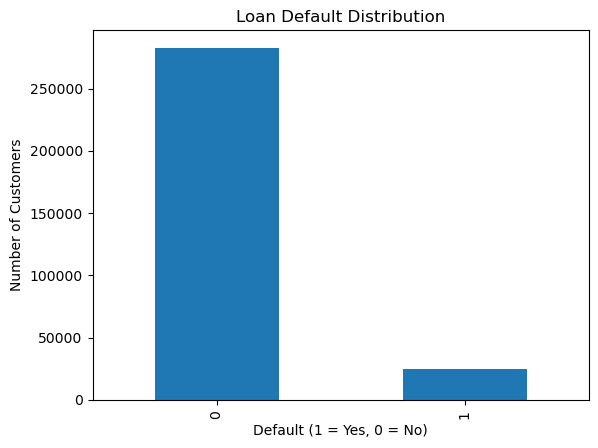

In [49]:
import matplotlib.pyplot as plt

df_small['TARGET'].value_counts().plot(kind='bar')
plt.title('Loan Default Distribution')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

#### 3.Age vs Loan Default

Insight:

Younger applicants tend to default slightly more

Older applicants show lower risk

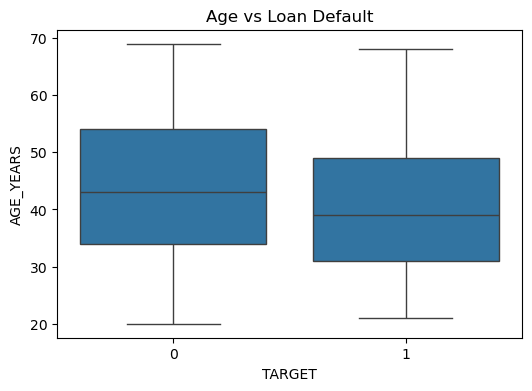

In [50]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AGE_YEARS', data=df_small)
plt.title('Age vs Loan Default')
plt.show()

#### 4.Income vs Loan Default

Lower income → higher default risk

High-income applicants are safer

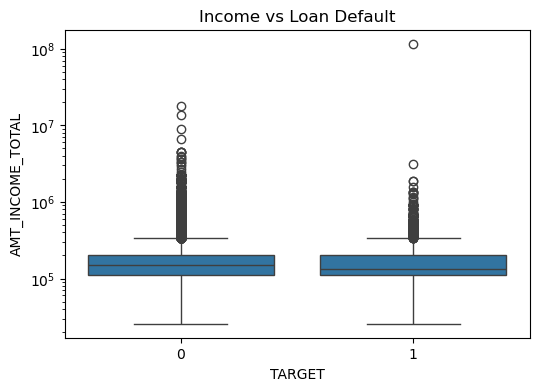

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_small)
plt.yscale('log')
plt.title('Income vs Loan Default')
plt.show()

#### 5.Credit Score Impact (VERY IMPORTANT)

Key Insight:

Defaulters have significantly lower credit scores

Strongest predictor in dataset

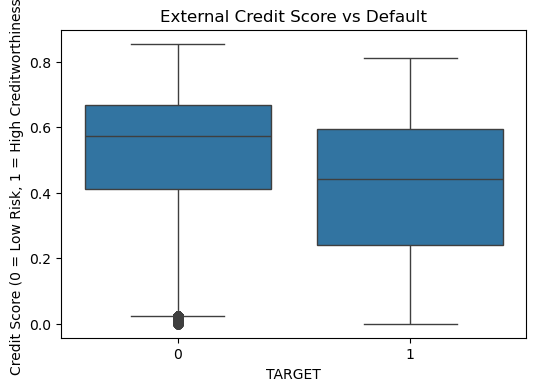

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=df_small)
plt.ylabel("Credit Score (0 = Low Risk, 1 = High Creditworthiness)")
plt.title('External Credit Score vs Default')
plt.show()

In [55]:
pd.crosstab(df_small['CODE_GENDER'], df_small['TARGET'], normalize='index') * 100

TARGET,0,1
CODE_GENDER,,
F,93.000672,6.999328
M,89.858080,10.141920


Insight:

Slight variation

Gender is not the strongest predictor